In [7]:
import torch

import torch.nn as nn

from torchvision import transforms
from torch.utils.data import DataLoader
from torch import optim

from train_functions import get_data, train_model, check, test_pretrained_model

from v1_ResNetE_Decoder import ResNetE_Decoder

In [8]:
H, W = 128, 128
BATCH_SIZE = 64
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"


train_transf = transforms.Compose([transforms.RandomRotation(degrees=5),
    transforms.RandomCrop(480), 
    transforms.ColorJitter(brightness = [0.8,1.2]),
    transforms.Resize((H, W)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()]
)

test_transf = transforms.Compose([transforms.Resize((H, W)),
                             transforms.ToTensor()])

train_dataset, test_dataset = get_data(reduced=True, train_transformation=train_transf, test_transformation=test_transf)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


print("The device is:", DEVICE)
print("Number of train images:", len(train_dataset))
print("Number of test images:", len(test_dataset))
print("Image shape:", train_dataset[0][0].shape)
print("Mask shape:", train_dataset[0][1].shape)

The device is: cuda
Number of train images: 1111
Number of test images: 338
Image shape: torch.Size([3, 128, 128])
Mask shape: torch.Size([1, 128, 128])


In [9]:
model = ResNetE_Decoder()

optimizer = optim.Adam(model.parameters())

criterion = nn.L1Loss()
scores = [criterion, nn.MSELoss()]

num_epochs = 50

In [10]:
trained_model, predictions, train_loss, test_loss = train_model(model, train_loader, test_loader, 
                                                                num_epochs, DEVICE, criterion, scores, optimizer)

Batch [1/18], Loss: 0.3314
Batch [2/18], Loss: 0.2661
Batch [3/18], Loss: 0.2418
Batch [4/18], Loss: 0.2029
Batch [5/18], Loss: 0.1950
Batch [6/18], Loss: 0.1708
Batch [7/18], Loss: 0.1701
Batch [8/18], Loss: 0.1703
Batch [9/18], Loss: 0.1497
Batch [10/18], Loss: 0.1427
Batch [11/18], Loss: 0.1494
Batch [12/18], Loss: 0.1336
Batch [13/18], Loss: 0.1360
Batch [14/18], Loss: 0.1338
Batch [15/18], Loss: 0.1399
Batch [16/18], Loss: 0.1480
Batch [17/18], Loss: 0.1176
Batch [18/18], Loss: 0.1480
Epoch [1/50], Train Loss: 0.1748
Test Loss: L1Loss(): 0.1713; MSELoss(): 0.0577
Batch [1/18], Loss: 0.1295
Batch [2/18], Loss: 0.1459
Batch [3/18], Loss: 0.1134
Batch [4/18], Loss: 0.1263
Batch [5/18], Loss: 0.1381
Batch [6/18], Loss: 0.1230
Batch [7/18], Loss: 0.1208
Batch [8/18], Loss: 0.1245
Batch [9/18], Loss: 0.1244
Batch [10/18], Loss: 0.1240
Batch [11/18], Loss: 0.1215
Batch [12/18], Loss: 0.1119
Batch [13/18], Loss: 0.1093
Batch [14/18], Loss: 0.1192
Batch [15/18], Loss: 0.1148
Batch [16/18],

Bad pipe message: %s [b"\xa3D\xde\xf1\xa9z\x15\xcd]\xce\xe3\x9c\xaa\xa0\xf2\xb8\xad\xd7\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0s\xc0w\x00\xc4\x00\xc3\xc0#\xc0'\x00g\x00@\xc0r\xc0v\x00\xbe\x00\xbd\xc0\n\xc0\x14\x009\x008\x00\x88\x00\x87\xc0\t\xc0\x13\x003\x002\x00\x9a\x00\x99\x00E\x00D\xc0\x07\xc0\x11\xc0\x08\xc0\x12\x00\x16\x00\x13\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0"]
Bad pipe message: %s [b'I\xbc\xa3\x9e\xe2\xb8\xd3Z\xbcP\xdbu\xd5\xb7\xf3\x13\xff\x8b\x00\x00>\xc0\x14\xc0\n\x009\x008\x007\x006\xc0\x0f\xc0\x05\x005\xc0\x13\xc0\t\x003\x002\x001\x000\xc0\x0e\xc0\x04\x00/\x00\x9a\x00\x99\x00\x98\x00\x97\x00\x96\x00\x07\xc0\x11\xc0\x07\xc0\x0c\xc0\x02\x00\x05\x00\x04\x00\xff\x02\x01\x00\x00', b'\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x1c\x00\x1a\x00\x17\x00\x19\

Batch [17/18], Loss: 0.0630
Batch [18/18], Loss: 0.0780
Epoch [30/50], Train Loss: 0.0639
Test Loss: L1Loss(): 0.1039; MSELoss(): 0.0223
Batch [1/18], Loss: 0.0568
Batch [2/18], Loss: 0.0582
Batch [3/18], Loss: 0.0638
Batch [4/18], Loss: 0.0694
Batch [5/18], Loss: 0.0591
Batch [6/18], Loss: 0.0603
Batch [7/18], Loss: 0.0639
Batch [8/18], Loss: 0.0606
Batch [9/18], Loss: 0.0545
Batch [10/18], Loss: 0.0702
Batch [11/18], Loss: 0.0603
Batch [12/18], Loss: 0.0604
Batch [13/18], Loss: 0.0584
Batch [14/18], Loss: 0.0701
Batch [15/18], Loss: 0.0654
Batch [16/18], Loss: 0.0613
Batch [17/18], Loss: 0.0597
Batch [18/18], Loss: 0.0803
Epoch [31/50], Train Loss: 0.0629
Test Loss: L1Loss(): 0.1720; MSELoss(): 0.0513
Batch [1/18], Loss: 0.0700
Batch [2/18], Loss: 0.0547
Batch [3/18], Loss: 0.0680
Batch [4/18], Loss: 0.0574
Batch [5/18], Loss: 0.0663
Batch [6/18], Loss: 0.0699
Batch [7/18], Loss: 0.0644
Batch [8/18], Loss: 0.0666
Batch [9/18], Loss: 0.0592
Batch [10/18], Loss: 0.0773
Batch [11/18], L

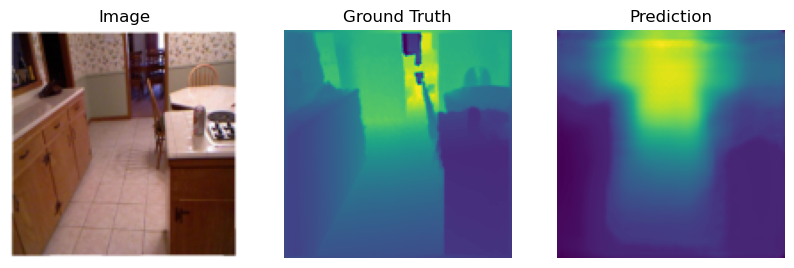

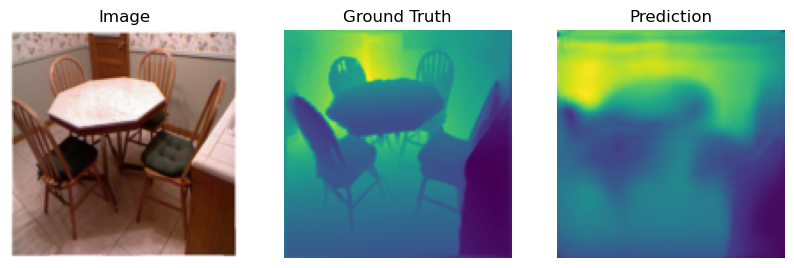

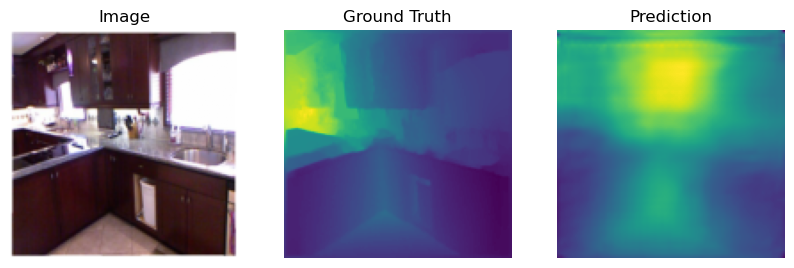

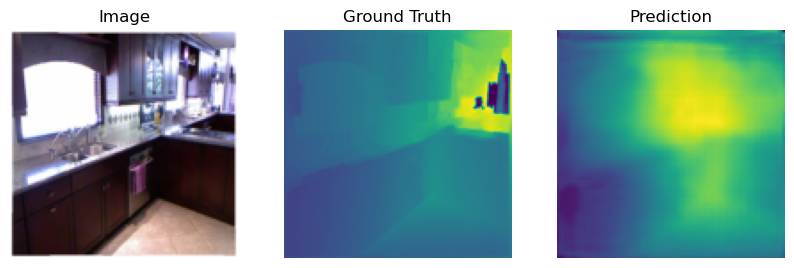

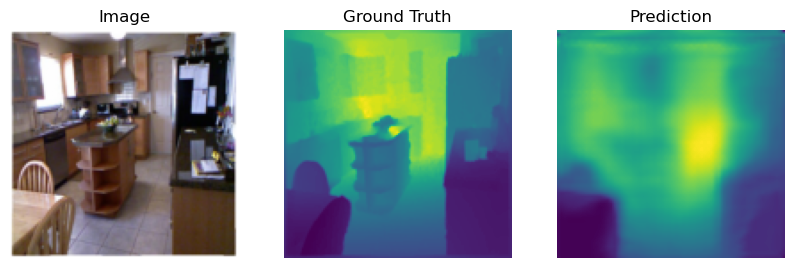

In [11]:
for i in range(10):
    image, mask = test_dataset[i][0], test_dataset[i][1]
    prediction = predictions[i]
    check(image, mask, prediction)

In [12]:
model = ResNetE_Decoder()
scores = [nn.L1Loss(), nn.MSELoss()]
path_to_weights = './checkpoints/ResNetE_Decoder/v1_trained_on_50.pth'

In [13]:
predictions, test_scores = test_pretrained_model(model, path_to_weights, test_loader, 1, DEVICE, scores)

FileNotFoundError: [Errno 2] No such file or directory: './checkpoints/ResNetE_Decoder/v1_trained_on_50.pth'

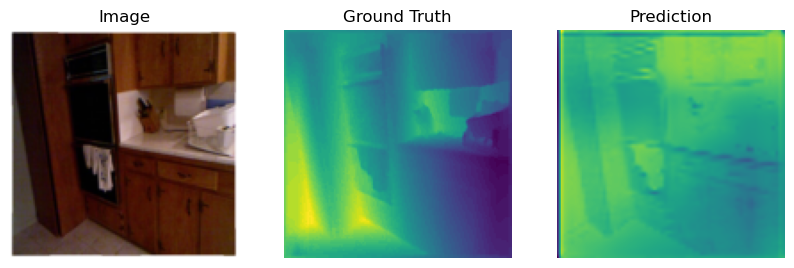

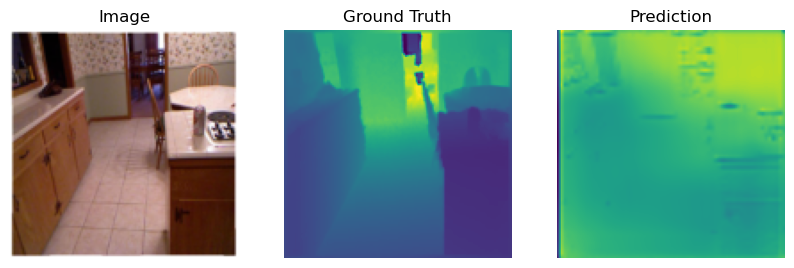

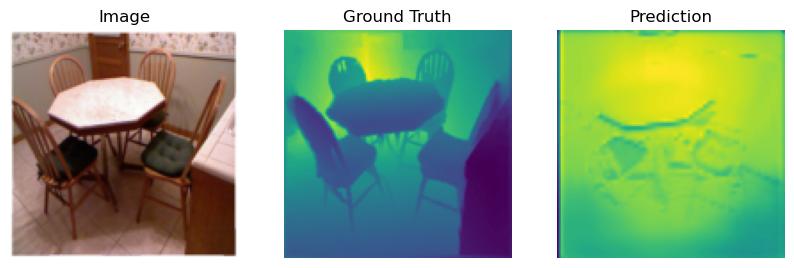

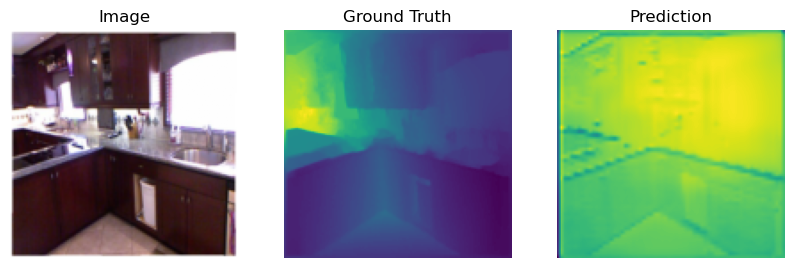

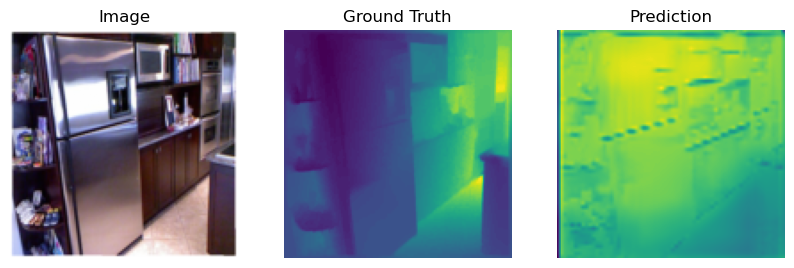

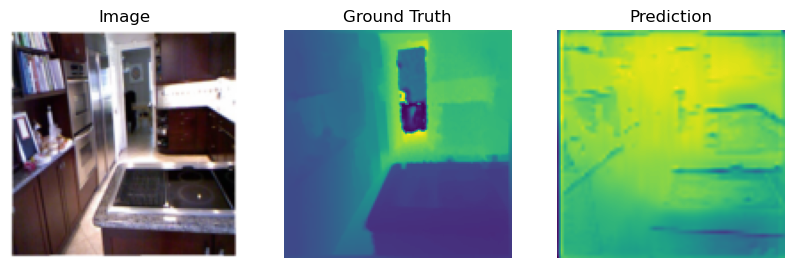

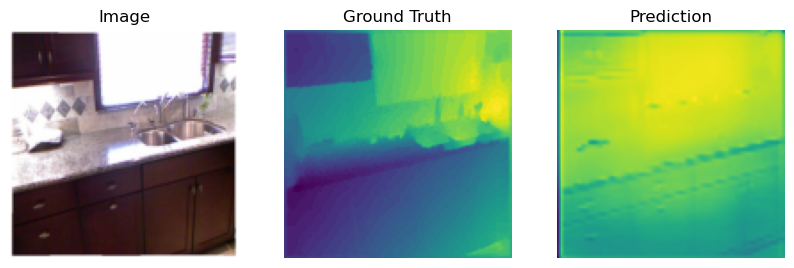

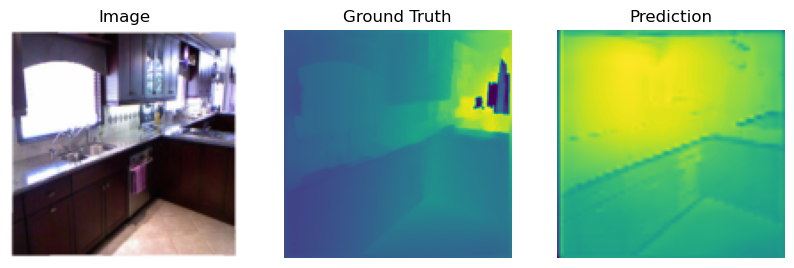

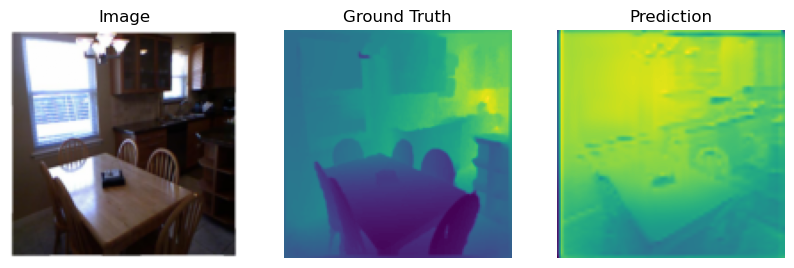

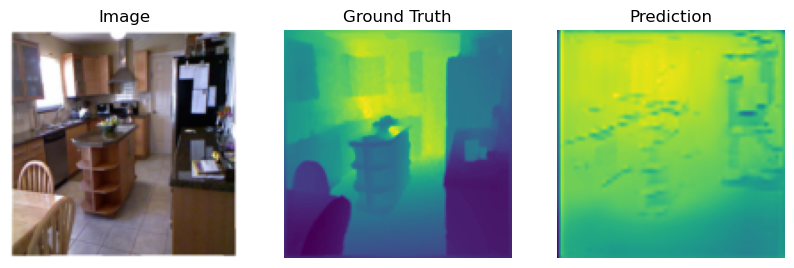

In [ ]:
for i in range(10):
    image, mask = test_dataset[i][0], test_dataset[i][1]
    prediction = predictions[i]
    check(image, mask, prediction)